In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
def std_col_names(df):
    """
    - Convert feature names to lower case
    - Rename reporting date column 
    """
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
    df.rename(columns = {'employment_duration': 'property', 'debit_to_income': 'debt_to_income', 'home_ownership': 'emp_duration'}, inplace= True)
    df['loan_title'] = df['loan_title'].str.lower().str.strip().str.replace(' ', '_')
    return df

In [3]:
# Load DF
df = std_col_names(pd.read_csv('./data/train.csv'))

In [4]:
cols = df.columns.to_list()
cols

['id',
 'loan_amount',
 'funded_amount',
 'funded_amount_investor',
 'term',
 'batch_enrolled',
 'interest_rate',
 'grade',
 'sub_grade',
 'property',
 'emp_duration',
 'verification_status',
 'payment_plan',
 'loan_title',
 'debt_to_income',
 'delinquency_-_two_years',
 'inquires_-_six_months',
 'open_account',
 'public_record',
 'revolving_balance',
 'revolving_utilities',
 'total_accounts',
 'initial_list_status',
 'total_received_interest',
 'total_received_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'collection_12_months_medical',
 'application_type',
 'last_week_pay',
 'accounts_delinquent',
 'total_collection_amount',
 'total_current_balance',
 'total_revolving_credit_limit',
 'loan_status']

In [5]:
model_cols = [
'loan_amount',
'funded_amount',
'funded_amount_investor',
'term',
'interest_rate',
'grade',
'property',
'verification_status',
'debt_to_income',
'delinquency_-_two_years',
'inquires_-_six_months',
'open_account',
'public_record',
'revolving_balance',
'revolving_utilities',
'total_accounts',
'initial_list_status',
'total_received_interest',
'total_received_late_fee',
'recoveries',
'collection_recovery_fee',
'collection_12_months_medical',
'application_type',
'last_week_pay',
'total_collection_amount',
'total_current_balance',
'total_revolving_credit_limit'
]

unused_cols = [
'id',
'batch_enrolled',
'sub_grade',
'emp_duration',
'payment_plan',
'accounts_delinquent',
'loan_title'
]

In [6]:
assert list(set(model_cols) & set(unused_cols)) == []
len(model_cols) + len(unused_cols)

34

In [7]:
df['loan_status'].value_counts()

0    61222
1     6241
Name: loan_status, dtype: int64

In [8]:
count_0 = int(61222*.25)
count_1 = 2*count_0
(count_0, count_1)

(15305, 30610)

## Train on all features

In [14]:
num_cols = [
'loan_amount',
'funded_amount',
'funded_amount_investor',
'term',
'interest_rate',
'debt_to_income',
'inquires_-_six_months',
'open_account',
'public_record',
'revolving_balance',
'revolving_utilities',
'total_accounts',
'total_received_interest',
'total_received_late_fee',
'recoveries',
'collection_recovery_fee',
'last_week_pay',
'total_collection_amount',
'total_current_balance',
'total_revolving_credit_limit',
]

cat_cols =[
'grade',
'property',
'verification_status',
'delinquency_-_two_years',
'collection_12_months_medical',
'application_type',
'initial_list_status',
]

In [15]:
len(cat_cols) + len(num_cols)

27

In [16]:
df.head()

,id,loan_amount,funded_amount,funded_amount_investor,term,batch_enrolled,interest_rate,grade,sub_grade,property,emp_duration,verification_status,payment_plan,loan_title,debt_to_income,delinquency_-_two_years,inquires_-_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,initial_list_status,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,application_type,last_week_pay,accounts_delinquent,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,debt_consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,debt_consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,debt_consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,debt_consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,credit_card_refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import log_loss, classification_report, confusion_matrix

In [18]:
x_train, x_val, y_train, y_val = train_test_split(df[num_cols+cat_cols], df['loan_status'], stratify= df['loan_status'], random_state=42, test_size=0.15)

In [19]:
len(x_train), len(x_val)

(57343, 10120)

In [20]:
x_train = x_train.reset_index(drop= True)
x_val = x_val.reset_index(drop= True)
y_train = y_train.reset_index(drop= True)
y_val = y_val.reset_index(drop= True)

In [21]:
def transform_dv(df, dv=None, train= False):
    """
    DictVectorize a dataframe
    """
    df_dict = df.to_dict(orient= 'records')
    
    if train:
        dv = DictVectorizer(sparse= False)
        train_dv = dv.fit_transform(df_dict)
        return df_dict, dv, train_dv
    else:
        try:
            val_dv = dv.transform(df_dict)
            return df_dict, val_dv
        except TypeError:
            print('DictVectorizer was not passed for non-train set')

In [ ]:
train_dict, dv, train_dv = transform_dv(x_train, train= True)

In [ ]:
len(dv.get_feature_names())

In [ ]:
val_dict, val_dv = transform_dv(x_val, dv= dv)

## Baseline RF

In [ ]:
rf= RandomForestClassifier(max_depth= 10, n_estimators= 150, random_state= 42, class_weight= 'balanced_subsample', criterion= 'entropy')

In [ ]:
rf.fit(train_dv, y_train)

In [ ]:
y_train_pred = rf.predict(train_dv)
ll_train = log_loss(y_train, y_train_pred)


In [ ]:
y_train_pred_proba = rf.predict_proba(train_dv)
y_train_pred_proba[:,1]

In [32]:
def prep_report(true_val, pred_val, targets = ['non-default (0)', 'default (1)']):
    ll = log_loss(true_val, pred_val)
    
    report = classification_report(true_val, pred_val, target_names= targets)
    
    print(f'Log loss: {ll}\n'), print(f'Classification Report:\n {report}')
    
    return ll, report



In [ ]:
ll1, cr1 = prep_report(y_train, y_train_pred)

y_val_pred = rf.predict(val_dv)

ll2, cr2 = prep_report(y_val, y_val_pred)

## Using SMOTE (imblearn)

In [ ]:
# Observe imbalance of classes in set
print(f'train distrib:\n{y_train.value_counts()}\nval distrib:\n{y_val.value_counts()}')

In [27]:
from imblearn.over_sampling import SMOTE

In [33]:
smote = SMOTE(sampling_strategy= 'not majority', random_state= 42, k_neighbors= 5)

x_train_bal, y_train_bal = smote.fit_resample(train_dv, y_train)

In [34]:
print(f'train distrib after resampling:\n{y_train_bal.value_counts()}')

train distrib after resampling:
0    52038
1    52038
Name: loan_status, dtype: int64


In [35]:
rf_bal= RandomForestClassifier(max_depth= 5, n_estimators= 150, random_state= 42, criterion= 'gini')
rf_bal.fit(x_train_bal, y_train_bal)

RandomForestClassifier(max_depth=5, n_estimators=150, random_state=42)

In [36]:
rf_bal_train_pred = rf_bal.predict(x_train_bal)
ll3, cr3 = prep_report(y_train_bal, rf_bal_train_pred)

Log loss: 2.794934228812962

Classification Report:
                  precision    recall  f1-score   support

non-default (0)       0.86      1.00      0.93     52038
    default (1)       1.00      0.84      0.91     52038

       accuracy                           0.92    104076
      macro avg       0.93      0.92      0.92    104076
   weighted avg       0.93      0.92      0.92    104076



In [37]:
rf_bal_val_pred = rf_bal.predict(val_dv)
ll4, cr4 = prep_report(y_val, rf_bal_val_pred)

Log loss: 3.1944955242723716

Classification Report:
                  precision    recall  f1-score   support

non-default (0)       0.91      1.00      0.95      9184
    default (1)       0.00      0.00      0.00       936

       accuracy                           0.91     10120
      macro avg       0.45      0.50      0.48     10120
   weighted avg       0.82      0.91      0.86     10120



## Feature Selection

In [38]:
df['bal_acc'] = df['total_accounts'] - df['open_account']


In [39]:
skim_num_cols = [
'revolving_utilities',
'total_received_interest',
'interest_rate',
'debt_to_income',
'funded_amount_investor',
'total_received_late_fee',
'recoveries',
'collection_recovery_fee',
'total_current_balance',
'total_revolving_credit_limit',
'loan_amount',
'funded_amount',
'revolving_balance',
'bal_acc'
]

In [40]:
x_train, x_val, y_train, y_val = train_test_split(df[skim_num_cols+cat_cols], df['loan_status'], stratify= df['loan_status'], random_state=42, test_size=0.15)

In [41]:
train_dict, dv, train_dv = transform_dv(x_train, train= True)

val_dict, val_dv = transform_dv(x_val, dv= dv)

In [42]:
smote2= SMOTE(sampling_strategy= 'minority', random_state= 42, k_neighbors= 5)
x_train_bal, y_train_bal = smote2.fit_resample(train_dv, y_train)

In [43]:
rf_skim = RandomForestClassifier(max_depth= 3, n_estimators= 100, random_state= 42, class_weight= 'balanced_subsample', criterion= 'entropy')
rf_skim.fit(x_train_bal, y_train_bal)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=3, random_state=42)

In [44]:
rf_bal_train_pred = rf_skim.predict(x_train_bal)
ll5, cr5 = prep_report(y_train_bal, rf_bal_train_pred)

Log loss: 3.3484828932433697

Classification Report:
                  precision    recall  f1-score   support

non-default (0)       0.84      0.99      0.91     52038
    default (1)       0.99      0.82      0.89     52038

       accuracy                           0.90    104076
      macro avg       0.92      0.90      0.90    104076
   weighted avg       0.92      0.90      0.90    104076



In [45]:
rf_bal_val_pred = rf_skim.predict(val_dv)
ll6, cr6 = prep_report(y_val, rf_bal_val_pred)

Log loss: 3.4538845135005976

Classification Report:
                  precision    recall  f1-score   support

non-default (0)       0.91      0.99      0.95      9184
    default (1)       0.11      0.01      0.02       936

       accuracy                           0.90     10120
      macro avg       0.51      0.50      0.48     10120
   weighted avg       0.83      0.90      0.86     10120



## Under-over sampling

In [46]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [47]:
full_dict, dv, full_dv = transform_dv(df[skim_num_cols+cat_cols], train= True)

In [58]:
len(dv.get_feature_names())

33

## Cross-Validation

In [ ]:
rf_ou = RandomForestClassifier()
over = SMOTE(sampling_strategy=0.25)
under= RandomUnderSampler(sampling_strategy= 0.5)
steps = [('over', over), ('under', under), ('model', rf_ou)]
pipeline = Pipeline(steps = steps)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)


In [ ]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

In [ ]:
# scores = cross_val_score(pipeline, full_dv, df['loan_status'], cv= cv, scoring= 'recall', verbose= 2, n_jobs= 4)

In [ ]:
pipeline.fit(full_dv, df['loan_status'])

In [ ]:
scores

In [52]:
over = SMOTE(sampling_strategy=0.25)
x_over, y_over = over.fit_resample(full_dv, df['loan_status'])

In [55]:
under = RandomUnderSampler(sampling_strategy= 0.5)
x_ou, y_ou = under.fit_resample(x_over, y_over)

## XGB

In [48]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [90]:
# Tuning parameter grid
xgb_cv_params = {
    'max_depth': [3,4,5,6,7], 
    'min_child_weight': [1,2,3,4],
    'subsample': [0.8,0.9,1], 
    'max_delta_step': [0,1,2,4],
    'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'n_estimators' : [50, 75, 100],
#     'booster': ['gbtree', 'dart']
}   

# Parameters fixed
fix_params = {'objective': 'binary:logistic', 'eval_metric': 'logloss', 'use_label_encoder': False, 'tree_method': 'gpu_hist', 'verbosity':2}  

# Create RandomizedSearchCV object
csv = RandomizedSearchCV(xgb.XGBClassifier(**fix_params), xgb_cv_params, scoring = 'neg_log_loss', cv = 4, verbose=1, n_jobs= -1, n_iter= 30, random_state=42) #, random_state=42


In [91]:
%%timeit
csv.fit(x_ou, y_ou)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
47.8 s ± 1.4 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [96]:
print(f'Best model: {csv.best_estimator_}')
print(f'Best score: {csv.best_score_}')


Best model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.15, max_delta_step=2,
              max_depth=5, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='gpu_hist', use_label_encoder=False,
              validate_parameters=1, verbosity=2)
Best score: -0.4288582611503699


In [98]:
# Final model parameter list; in case

fin_params = {
    'base_score':0.5, 'booster':'gbtree', 'colsample_bylevel':1,
              'colsample_bynode':1, 'colsample_bytree':1, 'enable_categorical':False,
              'eval_metric':'logloss', 'gamma':0, 'gpu_id':0, 'importance_type':None,
              'interaction_constraints':'', 'learning_rate':0.15, 'max_delta_step':2,
              'max_depth':5, 'min_child_weight':4, 
              'monotone_constraints':'()', 'n_estimators':50, 'n_jobs':8,
              'num_parallel_tree':1, 'predictor':'auto', 'random_state':0,
              'reg_alpha':0, 'reg_lambda':1, 'scale_pos_weight':1, 'subsample':0.8,
              'tree_method':'gpu_hist', 'use_label_encoder':False,
              'validate_parameters':1, 'verbosity':2
}


In [99]:
# Train model on entire set
dtrain = xgb.DMatrix(x_ou, y_ou)
fin_xgb = xgb.train(fin_params, dtrain, num_boost_round = 200)

[02:16:16] WARNING: ../src/learner.cc:576: 
Parameters: { "enable_categorical", "n_estimators", "use_label_encoder" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




## LR

In [112]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1798, in fit
    if self.l1_ratios is None or len(self.l1_ratios) == 0 or any(
TypeError: object of type 'float' has no len()

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
T

/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1789, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"

/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1798, in fit
    if self.l1_ratios is None or len(self.l1_ratios) == 0 or any(
TypeError: object of type 'int' has no len()

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Tra

In [115]:
scaler = StandardScaler()
x_ou_scaled = scaler.fit_transform(x_ou)

In [148]:
lr_cv_params = {
    'l1_ratios': [[0],[0.1], [0.25], [0.3], [0.4],[0.5], [0.6],[0.75],[1]],
    'Cs': [1, 3, 5, 7, 10],
    'tol' : [1e-4, 1e-3, 1e-2, 1e-1,1e-5]
}   

# Parameters fixed
fix_params = {'cv': 5, 'n_jobs': 5, 'penalty':'elasticnet', 'solver':'saga'}  

# Create RandomizedSearchCV object
lr_csv = RandomizedSearchCV(LogisticRegressionCV(**fix_params), lr_cv_params, scoring = 'neg_log_loss', cv = 4, verbose=1, n_jobs= -1, n_iter= 30, random_state=42)



In [149]:
%%timeit
lr_csv.fit(x_ou_scaled, y_ou)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits
Fitting 4 folds for each of 30 candidates, totalling 120 fits


/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages

/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages

Fitting 4 folds for each of 30 candidates, totalling 120 fits


/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages

Fitting 4 folds for each of 30 candidates, totalling 120 fits
2min 23s ± 1.66 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [152]:
print(lr_csv.best_estimator_)
print(lr_csv.best_score_)

LogisticRegressionCV(cv=5, l1_ratios=[0], n_jobs=5, penalty='elasticnet',
                     solver='saga', tol=0.01)
-0.6356281464855837


In [155]:
lr =LogisticRegressionCV(cv=5, l1_ratios= [0], n_jobs=5, penalty='elasticnet',
                     solver='saga', tol=0.01)

In [156]:
lr.fit(x_ou_scaled, y_ou)

LogisticRegressionCV(cv=5, l1_ratios=[0], n_jobs=5, penalty='elasticnet',
                     solver='saga', tol=0.01)

## Random Forests

In [201]:
rf_fin = RandomForestClassifier(n_estimators= 200, criterion= 'entropy', max_depth= 5, max_features= 'sqrt', class_weight='balanced', ccp_alpha= 0.01, max_samples= 0.85)

In [202]:
rf_fin.fit(x_ou, y_ou)

RandomForestClassifier(ccp_alpha=0.01, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_features='sqrt',
                       max_samples=0.85, n_estimators=200)

## Neural Network

In [198]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1
from tensorflow import keras as keras

In [199]:
model = Sequential([
        Dense(100, input_dim=33, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

TypeError: The added layer must be an instance of class Layer. Found: <tensorflow.python.keras.regularizers.L1 object at 0x7f6eac63f790>

In [195]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 100)               3400      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 101       
Total params: 3,501
Trainable params: 3,501
Non-trainable params: 0
_________________________________________________________________


In [196]:
history = model.fit(x_ou_scaled, y_ou, epochs= 100, verbose= 1, validation_split=0.2, shuffle= True, initial_epoch= 1)

Epoch 2/100
1148/1148 [==============================] - 4s 3ms/step - loss: 0.4746 - recall: 0.0103 - val_loss: 1.7010 - val_recall: 0.0000e+00
Epoch 3/100
1148/1148 [==============================] - 3s 3ms/step - loss: 0.4542 - recall: 0.0000e+00 - val_loss: 1.6578 - val_recall: 0.0000e+00
Epoch 4/100
1148/1148 [==============================] - 3s 3ms/step - loss: 0.4502 - recall: 0.0000e+00 - val_loss: 1.5527 - val_recall: 1.0890e-04
Epoch 5/100
1148/1148 [==============================] - 3s 3ms/step - loss: 0.4456 - recall: 1.1436e-04 - val_loss: 1.6067 - val_recall: 0.0016
Epoch 6/100
1148/1148 [==============================] - 3s 3ms/step - loss: 0.4480 - recall: 8.2667e-04 - val_loss: 1.6222 - val_recall: 0.0000e+00
Epoch 7/100
1148/1148 [==============================] - 3s 3ms/step - loss: 0.4507 - recall: 9.4748e-04 - val_loss: 1.5903 - val_recall: 0.0000e+00
Epoch 8/100
1148/1148 [==============================] - 3s 3ms/step - loss: 0.4464 - recall: 4.2688e-04 - val_los

KeyboardInterrupt: 

In [182]:
history.history

{'loss': [0.4807857573032379,
  0.4584815204143524,
  0.45579248666763306,
  0.45407530665397644,
  0.45230376720428467,
  0.4517146050930023,
  0.4511686861515045,
  0.45064520835876465,
  0.4499441683292389,
  0.44997113943099976,
  0.4494684040546417,
  0.44968166947364807,
  0.44923660159111023,
  0.4488334655761719,
  0.44854262471199036,
  0.44843462109565735,
  0.4483053982257843,
  0.44835901260375977,
  0.44828000664711,
  0.44789689779281616,
  0.44783249497413635,
  0.44762879610061646,
  0.4477617144584656,
  0.4473598897457123,
  0.44742903113365173,
  0.44734320044517517,
  0.4469503164291382,
  0.44694122672080994,
  0.44682765007019043,
  0.4467333257198334,
  0.44667965173721313,
  0.446922242641449,
  0.44637078046798706,
  0.446402907371521,
  0.44672200083732605,
  0.4464409351348877,
  0.44602057337760925,
  0.44577133655548096,
  0.44617441296577454,
  0.445699542760849,
  0.4462657868862152,
  0.4458165764808655,
  0.44580021500587463,
  0.4458779990673065,
  0.4

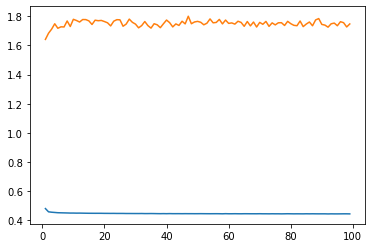

In [186]:
import matplotlib.pyplot as plt
plt.plot(range(1, 100), history.history['binary_crossentropy'])
plt.plot(range(1, 100), history.history['val_binary_crossentropy'])

### Test

In [100]:
test_df = df = std_col_names(pd.read_csv('./data/test.csv'))

In [101]:
test_df.head()

,id,loan_amount,funded_amount,funded_amount_investor,term,batch_enrolled,interest_rate,grade,sub_grade,property,emp_duration,verification_status,payment_plan,loan_title,debt_to_income,delinquency_-_two_years,inquires_-_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,initial_list_status,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,application_type,last_week_pay,accounts_delinquent,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,76468.82190,Source Verified,n,home_improvement,16.749219,1,0,12,1,3576,67.278287,5,f,4469.449851,0.088031,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.01344,Source Verified,n,credit_card_refinancing,18.157975,0,0,11,0,1932,71.313157,21,w,993.907530,0.041237,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.93268,Source Verified,n,debt_consolidation,15.190011,0,0,22,0,598,50.883065,23,f,729.113379,0.021745,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,68867.98965,Verified,n,debt_consolidation,21.292550,0,0,11,0,5222,82.449083,28,w,715.867091,0.092398,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,91556.85423,Verified,n,debt_consolidation,4.812117,0,0,11,0,553,49.075855,9,w,248.572854,0.010354,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN


In [ ]:
test_dict, test_dv = transform_dv(test_df[num_cols+cat_cols], dv= dv)

In [ ]:
test_pred = rf.predict(test_dv)

In [ ]:
test_pred2 = rf_bal.predict(test_dv)

## Include `bal_acc` in test set

In [102]:
test_df['bal_acc'] = test_df['total_accounts'] - test_df['open_account']

In [103]:
test_dict, test_dv = transform_dv(test_df[skim_num_cols+cat_cols], dv= dv)

In [ ]:
test_pred3 = rf_skim.predict(test_dv)
# pd.Series(test_pred3).value_counts()

In [ ]:
test_pred4 = rf_ou.predict(test_dv)
# pd.Series(test_pred4).value_counts()

In [227]:
dtest = xgb.DMatrix(test_dv)
test_pred5 = fin_xgb.predict(dtest)


thresh = 0.35
test_pred5[test_pred5>thresh] = 1
test_pred5[test_pred5 <= thresh] = 0
test_pred5 = test_pred5.astype('int')


In [228]:
pd.Series(test_pred5).value_counts()

0    24569
1     4344
dtype: int64

In [158]:
test_df_scaled = scaler.transform(test_dv)

test_pred6 = lr.predict(test_df_scaled)

/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages

/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages

/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/doctor_s/anaconda3/envs/ml/lib/python3.8/site-packages

In [203]:
test_pred7 = rf_fin.predict(test_dv)

## Aggregating outputs

In [205]:
op_df = pd.DataFrame({'xgb': test_pred5, 'lr': test_pred6, 'rf': test_pred7})
op_df['xgb_bin'] = op_df['xgb'].map(lambda x: 1 if x > 0.5 else 0)

In [209]:
print(op_df['xgb_bin'].value_counts())
print(op_df['rf'].value_counts())
print(op_df['lr'].value_counts())

0    26711
1     2202
Name: xgb_bin, dtype: int64
0    28913
Name: rf, dtype: int64
0    28913
Name: lr, dtype: int64


In [105]:
def get_sub(arr, outfile= 'sub.csv'):
    """
    Convert predicted output to a dataframe and extract to local
    """
    out_df = pd.DataFrame(arr, columns=['Loan Status'])
    out_df.to_csv(outfile, index= False)
    return out_df

In [230]:
sub6 = get_sub(test_pred5, './subs/sub6.csv')

## References

- [Resampling](https://datascience.stackexchange.com/questions/57882/resampling-for-imbalaced-datasets-should-testing-set-also-be-resampled
)